In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

<ipython-input-3-6ff197ce198b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_data['Date'] = pd.to_datetime(apple_data['Date'], format='%d-%m-%Y')


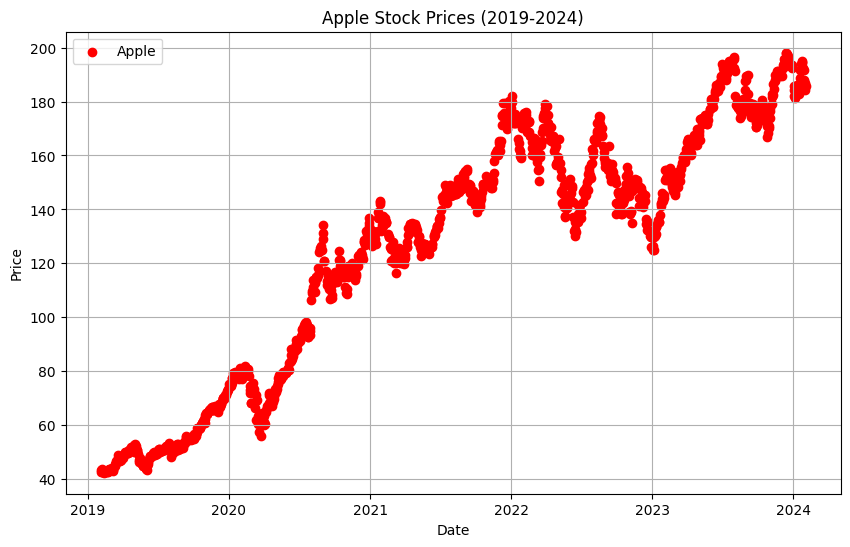

In [3]:
# Read the datasets
df_apple = pd.read_csv("/content/Stock Market Dataset.csv")

# Select only the 'Date' and 'Apple_Price' columns for Apple
apple_data = df_apple[['Date', 'Apple_Price']]

# Convert 'Date' column to datetime
apple_data['Date'] = pd.to_datetime(apple_data['Date'], format='%d-%m-%Y')

# Filter Apple data for the years between 2019 and 2024
apple_data = apple_data[apple_data['Date'].dt.year.between(2019, 2024)]

# Plot scatter plot for Apple only
plt.figure(figsize=(10, 6))
plt.scatter(apple_data['Date'], apple_data['Apple_Price'], color='red', label='Apple')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Prices (2019-2024)')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-13-f187062f42ed>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung_data['Date'] = pd.to_datetime(samsung_data['Date'])


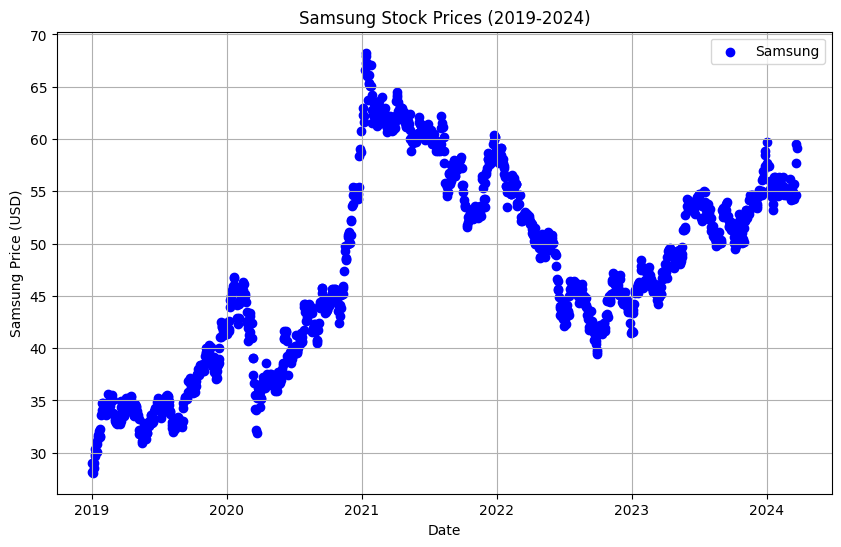

In [13]:
# Read the datasets
df_samsung = pd.read_csv("/content/005930.KS.csv")

# Select only the 'Date' and 'Close' columns for Samsung
samsung_data = df_samsung[['Date', 'Close']]

# Convert 'Date' column to datetime
samsung_data['Date'] = pd.to_datetime(samsung_data['Date'])

# Filter Samsung data for the years between 2019 and 2024
samsung_data = samsung_data[samsung_data['Date'].dt.year.between(2019, 2024)]

# Multiply every price value in Samsung data with 0.00075 to convert it to USD
samsung_data['Close'] *= 0.00075

# Rename 'Close' column to 'Samsung_Price'
samsung_data = samsung_data.rename(columns={'Close': 'Samsung_Price'})

# Plot scatter plot for Samsung only
plt.figure(figsize=(10, 6))
plt.scatter(samsung_data['Date'], samsung_data['Samsung_Price'], color='blue', label='Samsung')
plt.xlabel('Date')
plt.ylabel('Samsung Price (USD)')
plt.title('Samsung Stock Prices (2019-2024)')
plt.legend()
plt.grid(True)
plt.show()


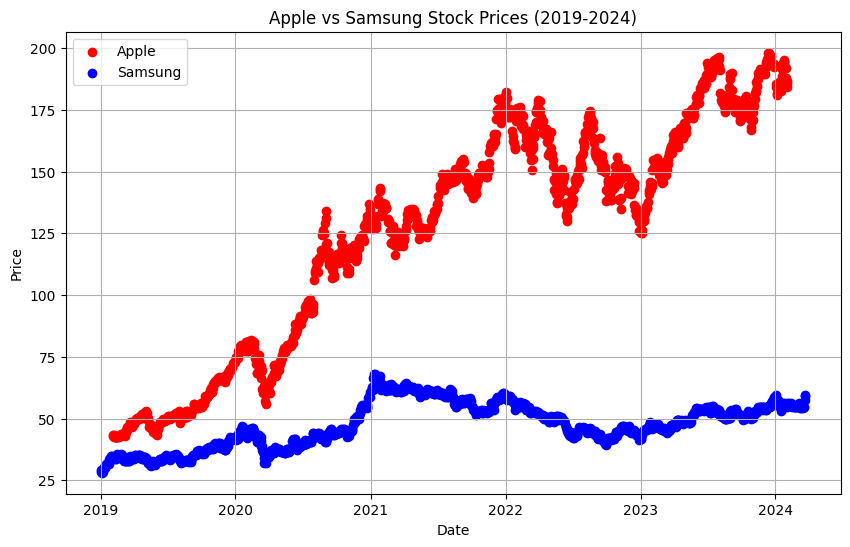

In [14]:

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(apple_data['Date'], apple_data['Apple_Price'], color='red', label='Apple')
plt.scatter(samsung_data['Date'], samsung_data['Samsung_Price'], color='blue', label='Samsung')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple vs Samsung Stock Prices (2019-2024)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:

# Merge the datasets on 'Date' column
merged_data = pd.merge(apple_data, samsung_data, on='Date')

# Prepare the data for modeling
X = merged_data[['Apple_Price']].values
y = merged_data['Samsung_Price'].values


# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(X.flatten(), y)
print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)


Pearson correlation coefficient: 0.734533043597163
p-value: 4.230765734294803e-200


In [16]:


# Prepare the data for modeling
X = merged_data[['Apple_Price']].values  # Feature (Independent variable)
y = merged_data['Samsung_Price'].values           # Target (Dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Coefficients
print("Coefficients:", model.coef_)

# Intercept
print("Intercept:", model.intercept_)

R_squared = model.score(X_test, y_test)
print("R-squared:", R_squared)
p_value =pearsonr(X.flatten(),y)
p_value

Mean Squared Error: 37.04592231237042
Coefficients: [0.14226634]
Intercept: 29.700992174908148
R-squared: 0.51175296540383


PearsonRResult(statistic=0.734533043597163, pvalue=4.230765734294803e-200)

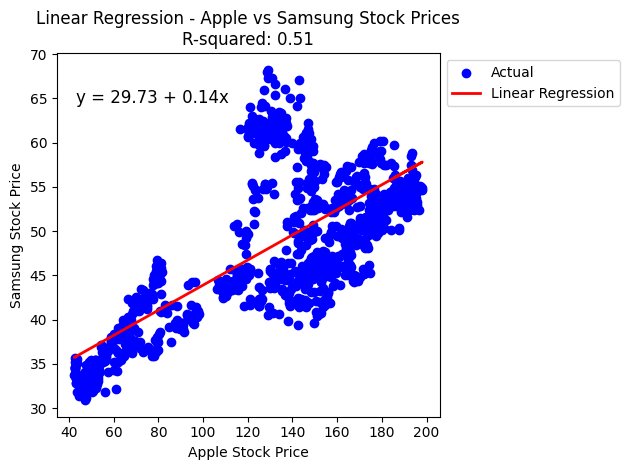

R-squared: 0.51175296540383


In [21]:
plt.scatter(X, y, color='blue', label='Actual')

# Plot the linear regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')

# Add the equation of the linear regression line
equation_text = f'y = {model.intercept_:.2f} + {model.coef_[0]:.2f}x'
plt.text(0.05, 0.9, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Add labels and title
plt.title(f'Linear Regression - Apple vs Samsung Stock Prices\nR-squared: {R_squared:.2f}')
plt.xlabel('Apple Stock Price')
plt.ylabel('Samsung Stock Price')

# Move the legend outside the plot area
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()

print("R-squared:", R_squared)

k=1, MSE=48.97624337923729
k=3, MSE=31.349589512711866
k=5, MSE=27.506308633474575
k=7, MSE=26.56109446612332
k=9, MSE=25.286210128295668
k=11, MSE=24.933094331095045
k=13, MSE=25.0253235045695
k=15, MSE=24.74615574682204
Best k value: 15
Best k value: 15, Best MSE: 24.74615574682204
Root Mean Squared Error: 4.974550808547646
R^2 Score: 0.6738578389501639
       Actual  Predicted
107   49.9500     52.340
774   45.0000     56.945
81    50.6250     51.170
787   43.6500     44.465
665   64.0500     57.630
...       ...        ...
644   61.9500     60.975
292   47.1750     51.045
1169  34.4625     34.220
319   41.4000     53.980
1058  33.7125     34.005

[236 rows x 2 columns]


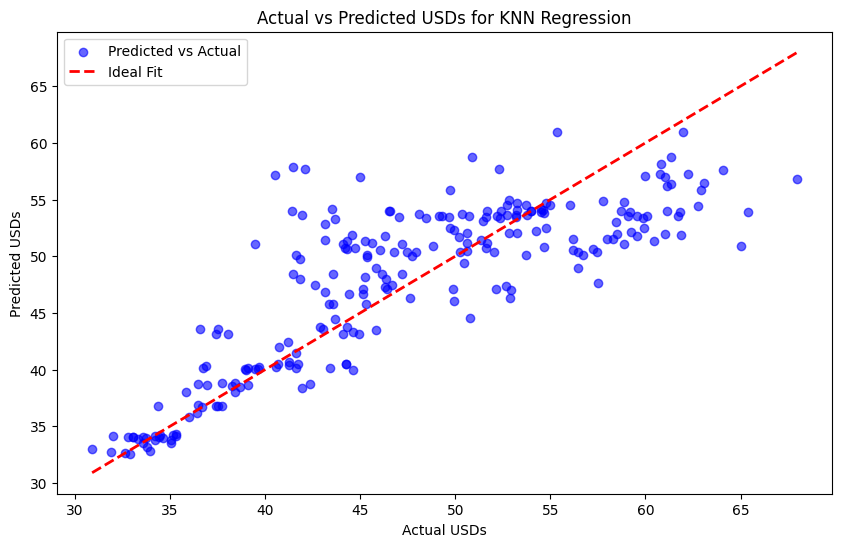

In [25]:

mse_values = []
k_values = [1, 3, 5, 7, 9, 11, 13, 15]

for k in k_values:
    # Initialize the kNN model
    knn = KNeighborsRegressor(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    print(f"k={k}, MSE={mse}")

# Find the k value with the lowest MSE
best_k = k_values[np.argmin(mse_values)]
print(f"Best k value: {best_k}")

# Initialize the kNN model with the best k value
best_knn = KNeighborsRegressor(n_neighbors=best_k)

# Train the model
best_knn.fit(X_train, y_train)

# Predict on the test set
best_y_pred = best_knn.predict(X_test)

# Calculate the Mean Squared Error for the best k value
best_mse = mean_squared_error(y_test, best_y_pred)
best_rmse = np.sqrt(best_mse)
print(f"Best k value: {best_k}, Best MSE: {best_mse}")
print(f"Root Mean Squared Error: {best_rmse}")

# Calculate the R^2 score
r_squared = r2_score(y_test, best_y_pred)
print(f"R^2 Score: {r_squared}")

# Show the predictions vs actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': best_y_pred})
print(results)

# Plotting the graph of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_y_pred, alpha=0.6, color='b', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual USDs')
plt.ylabel('Predicted USDs')
plt.title('Actual vs Predicted USDs for KNN Regression')
plt.legend()
plt.show()


max_depth=1, MSE=34.3399361885892
max_depth=2, MSE=27.985719139769927
max_depth=3, MSE=25.907431328519138
max_depth=4, MSE=26.67348544112803
max_depth=5, MSE=26.32883549297396
max_depth=6, MSE=25.75091029150531
max_depth=7, MSE=25.898646982836457
max_depth=8, MSE=27.984521091207792
max_depth=9, MSE=33.6023497448293
max_depth=10, MSE=35.11407145722921
Best max_depth value: 6
Best max_depth value: 6, Best MSE: 25.75091029150531
Root Mean Squared Error: 5.074535475440615
R^2 Score: 0.660615668251803
       Actual  Predicted
107   49.9500  52.831098
774   45.0000  60.900000
81    50.6250  51.480000
787   43.6500  44.181250
665   64.0500  56.952500
...       ...        ...
644   61.9500  56.952500
292   47.1750  51.421205
1169  34.4625  34.214423
319   41.4000  51.421205
1058  33.7125  34.032398

[236 rows x 2 columns]


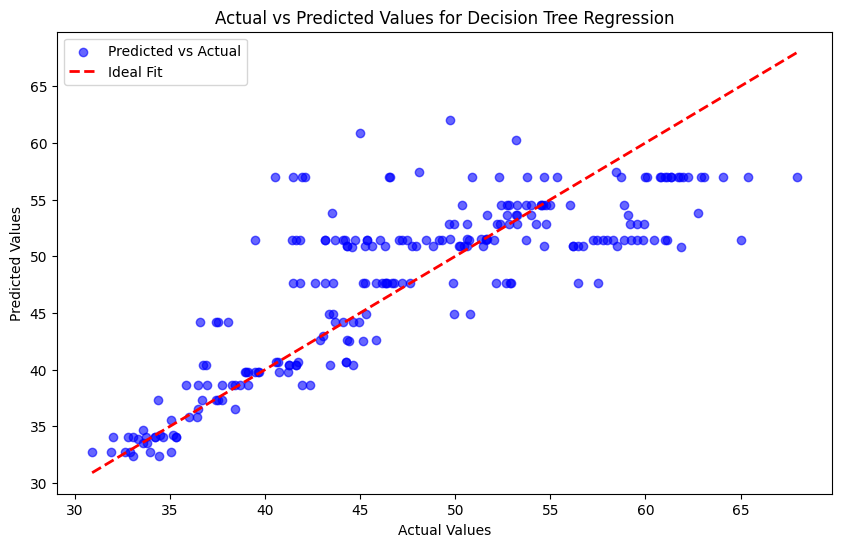

In [26]:

# Define the max_depth values to evaluate
depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

mse_values = []

for depth in depth_values:
    # Initialize the Decision Tree model
    dt = DecisionTreeRegressor(max_depth=depth)

    # Train the model
    dt.fit(X_train, y_train)

    # Predict on the test set
    y_pred = dt.predict(X_test)

    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    print(f"max_depth={depth}, MSE={mse}")

# Find the max_depth value with the lowest MSE
best_depth = depth_values[np.argmin(mse_values)]
print(f"Best max_depth value: {best_depth}")

# Initialize the Decision Tree model with the best max_depth value
best_dt = DecisionTreeRegressor(max_depth=best_depth)

# Train the model
best_dt.fit(X_train, y_train)

# Predict on the test set
best_y_pred = best_dt.predict(X_test)

# Calculate the Mean Squared Error for the best max_depth value
best_mse = mean_squared_error(y_test, best_y_pred)
best_rmse = np.sqrt(best_mse)
print(f"Best max_depth value: {best_depth}, Best MSE: {best_mse}")
print(f"Root Mean Squared Error: {best_rmse}")

# Calculate the R^2 score
r_squared = r2_score(y_test, best_y_pred)
print(f"R^2 Score: {r_squared}")

# Show the predictions vs actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': best_y_pred})
print(results)

# Plotting the graph of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_y_pred, alpha=0.6, color='b', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Decision Tree Regression')
plt.legend()
plt.show()


n_estimators=10, MSE=36.597861626278224
n_estimators=50, MSE=35.553492474999324
n_estimators=100, MSE=35.63084794679136
n_estimators=200, MSE=35.97363468450587
n_estimators=300, MSE=35.81170314133344
Best n_estimators value: 50
Best n_estimators value: 50, Best MSE: 35.553492474999324
Root Mean Squared Error: 5.962674942926147
R^2 Score: 0.5314224565908794
       Actual  Predicted
107   49.9500   52.62750
774   45.0000   55.40850
81    50.6250   48.39000
787   43.6500   44.48400
665   64.0500   61.03950
...       ...        ...
644   61.9500   57.85650
292   47.1750   53.42850
1169  34.4625   34.73675
319   41.4000   60.01650
1058  33.7125   34.16400

[236 rows x 2 columns]


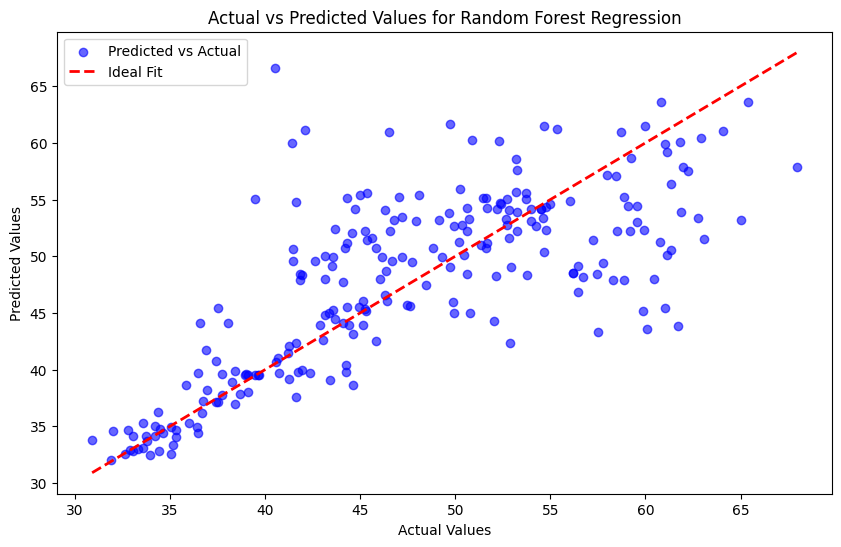

In [27]:

# Define the number of trees in the forest to evaluate
n_estimators_values = [10, 50, 100, 200, 300]

mse_values = []

for n_estimators in n_estimators_values:
    # Initialize the Random Forest model
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    # Train the model
    rf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf.predict(X_test)

    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    print(f"n_estimators={n_estimators}, MSE={mse}")

# Find the n_estimators value with the lowest MSE
best_n_estimators = n_estimators_values[np.argmin(mse_values)]
print(f"Best n_estimators value: {best_n_estimators}")

# Initialize the Random Forest model with the best n_estimators value
best_rf = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)

# Train the model
best_rf.fit(X_train, y_train)

# Predict on the test set
best_y_pred = best_rf.predict(X_test)

# Calculate the Mean Squared Error for the best n_estimators value
best_mse = mean_squared_error(y_test, best_y_pred)
best_rmse = np.sqrt(best_mse)
print(f"Best n_estimators value: {best_n_estimators}, Best MSE: {best_mse}")
print(f"Root Mean Squared Error: {best_rmse}")

# Calculate the R^2 score
r_squared = r2_score(y_test, best_y_pred)
print(f"R^2 Score: {r_squared}")

# Show the predictions vs actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': best_y_pred})
print(results)

# Plotting the graph of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_y_pred, alpha=0.6, color='b', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Regression')
plt.legend()
plt.show()
